In [1]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../GeMpy")

# Importing GeMpy modules
import GeMpy

# Reloading (only for development purposes)
import importlib
importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

In [23]:
# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.import_data([0,10,0,10,-10, 0],[ 50, 50, 50],
                         path_f = "./GeoModeller/test_c/test_c_Foliations.csv",
                         path_i = "./GeoModeller/test_c/test_c_Points.csv")
geo_data.interfaces.set_value(0, 'X', 1.5463)
geo_data.interfaces.set_value(1, 'X', 1.5462)
geo_data.interfaces.set_value(0, 'Z', -4.6149)
geo_data.interfaces.set_value(1, 'Z', -4.6148)


geo_data.interfaces = geo_data.interfaces[:2]

geo_data.foliations = pn.concat([geo_data.foliations]*2)
geo_data.foliations.reset_index(drop=True, inplace=True)
geo_data.foliations.set_value(1, 'X', 8.04773195)
geo_data.foliations.set_value(1, 'Z', -4)


,X,Y,Z,azimuth,dip,polarity,formation,series,order_series,G_x,G_y,G_z
0,5.047732,5.012474,-5.0,90.0,0.0,1,A,Default serie,1,0.0,0.0,1.0
1,8.047732,5.012474,-4.0,90.0,0.0,1,A,Default serie,1,0.0,0.0,1.0


In [24]:
geo_data.interfaces

,X,Y,Z,formation,series,order_series
0,1.5463,5.012474,-4.6149,A,Default serie,1
1,1.5462,5.012474,-4.6148,A,Default serie,1


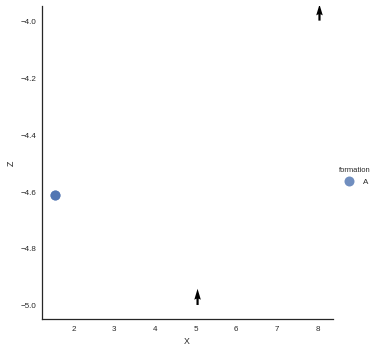

In [25]:
GeMpy.plot_data(geo_data)

In [26]:
data_interp = GeMpy.set_interpolator(geo_data,
                                     dtype="float64",
                                     verbose=['cov_gradients',
                                             'b_vector'])

In [46]:
 np.sqrt((10 - 0) ** 2 +
         (10 - 0) ** 2 +
         (10 - 0) ** 2)

17.320508075688775

In [52]:
17.32/data_interp.rescaling_factor

1.3319937618702313

In [48]:
data_interp.interpolator.tg.a_T.get_value()


array(1.33203283540649)

In [51]:
data_interp.interpolator.tg.c_o_T.get_value()

array(0.04224551130002508)

In [49]:
((17.32)**2/2/14/3)/data_interp.rescaling_factor

0.27464442804276673

In [50]:
(17/data_interp.rescaling_factor)**2/2/14/3

0.020348254609512086

In [44]:
data_interp.extent

array([0.13118956382195424, 0.9002390799133118, 0.11461592958794886, 0.8836654456793064, 0.07712276614975333, 0.8461722822411109], dtype=object)

In [28]:
# This cell will go to the backend

# Set all the theano shared parameters and return the symbolic variables (the input of the theano function)
input_data_T = data_interp.interpolator.tg.input_parameters_list()

# Prepare the input data (interfaces, foliations data) to call the theano function.
#Also set a few theano shared variables with the len of formations series and so on
input_data_P = data_interp.interpolator.data_prep(u_grade=[0]) 

data_interp.interpolator.u_grade_T_op = theano.shared(0)
# Compile the theano function.
#compiled_f2 = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(),
                            #on_unused_input='ignore',
#                            allow_input_downcast=True, profile=True)




In [29]:
kriging = theano.function(input_data_T, data_interp.interpolator.tg.solve_kriging(),
                            on_unused_input='ignore',
                            allow_input_downcast=True, profile=True)

In [30]:
a = 100

data_interp.interpolator.tg.i_reescale.set_value(6000)
data_interp.interpolator.tg.gi_reescale.set_value(60000)
input_data_P = data_interp.interpolator.data_prep(u_grade=[0])

In [31]:
kriging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Cov Gradients __str__ = [[ 0.343333  0.125769  0.        0.        0.       -0.031989]
 [ 0.125769  0.343333  0.        0.       -0.031989  0.      ]
 [ 0.        0.        0.343333  0.221735  0.        0.      ]
 [ 0.        0.        0.221735  0.343333  0.        0.      ]
 [ 0.       -0.031989  0.        0.        0.343333  0.211072]
 [-0.031989  0.        0.        0.        0.211072  0.343333]]
b vector __str__ = [ 0.  0. -0. -0.  1.  1.  0.]


array([ 1.469797, -0.993369,  0.      ,  0.      , -0.441686,  1.885582, -7.976592], dtype=float32)

In [66]:
kriging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Cov Gradients __str__ = [[ 0.343333  0.128792  0.        0.        0.       -0.031999]
 [ 0.128792  0.343333  0.        0.       -0.031999  0.      ]
 [ 0.        0.        0.343333  0.223262  0.        0.      ]
 [ 0.        0.        0.223262  0.343333  0.        0.      ]
 [ 0.       -0.031999  0.        0.        0.343333  0.212423]
 [-0.031999  0.        0.        0.        0.212423  0.343333]]
b vector __str__ = [ 0.  0. -0. -0.  1.  1.  0.]


array([-0.932137, -0.268669,  0.      ,  0.      ,  1.942458,  1.20067 , -0.657767], dtype=float32)

In [39]:
c = np.array(
            [[ 0.343333,  0.125769,  0.      ,  0.      ,  0.      , -0.031989],
             [ 0.125769,  0.343333,  0.      ,  0.      , -0.031989,  0.      ],
             [ 0.      ,  0.      ,  0.343333,  0.221735,  0.      ,  0.      ],
             [ 0.      ,  0.      ,  0.221735,  0.343333,  0.      ,  0.      ],
             [ 0.      , -0.031989,  0.      ,  0.      ,  0.343333,  0.211072],
             [-0.031989,  0.      ,  0.      ,  0.      ,  0.211072,  0.343333],]
)
b = np.array([ 0.,  0., -0., -0.,  1., 1])

In [40]:
np.linalg.solve(c,b)

array([ 0.123486,  0.123486, -0.      , -0.      ,  1.810861,  1.810861])

In [112]:
result = np.array([0.67437265590,0,3.027615,1.1771865])

In [127]:
import pymc as pm

In [128]:
a = pm.Uniform('a',0, 10)
b = pm.Uniform('b', 0, 10)

@pm.deterministic
def kriging_f(value=0, a=a, b=b):
    data_interp.interpolator.tg.i_reescale.set_value(a)
    data_interp.interpolator.tg.gi_reescale.set_value(b)
    input_data_P = data_interp.interpolator.data_prep(u_grade=[0])

    k = kriging(input_data_P[0], input_data_P[1], input_data_P[2],
            input_data_P[3],input_data_P[4], input_data_P[5])
    print(a,b)
    print(k)
    cost = pm.normal_like((result - k).sum(), 0, 1./0.00000000000000001) 
    return cost

model = pm.Model([a,b,kriging_f])


4.803443571136555 9.09782699087833
[-0.553288  0.        2.814871 -0.209652]


In [129]:
M = pm.MAP(model)
M.fit()

In [130]:
print(a.value, b.value)
data_interp.interpolator.tg.i_reescale.set_value(a.value)
data_interp.interpolator.tg.gi_reescale.set_value(b.value)
input_data_P = data_interp.interpolator.data_prep(u_grade=[0])
kriging(input_data_P[0], input_data_P[1], input_data_P[2],
        input_data_P[3],input_data_P[4], input_data_P[5])

7.3913725326823965 7.498398928462048


array([-0.641598,  0.      ,  2.799269, -0.294971], dtype=float32)

In [105]:
([0.67437265590,0,3.027615,-1.1771865])

In [25]:
a.value/b.value

1.5461369085578494

In [61]:
sol2 = compiled_f2(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Cov Gradients __str__ = [[ 0.343333  0.        0.      ]
 [ 0.        0.343333  0.      ]
 [ 0.        0.        0.343333]]
b vector __str__ = [ 0. -0.  1.  0.]
Dual Kriging parameters __str__ = [-0.674329  0.        2.793487 -0.455812]


In [18]:
c = np.array(   [[ 0.343333 , 0.        ,0.         ],
                 [ 0.    ,    0.34333,  0.       ],
                 [ 0.    ,    0.     ,   0.343333]]
)

b = np.array([ 0., -0.,  1., ]
)

In [19]:
np.linalg.solve(c,b)

array([ 0.      , -0.      ,  2.912624])

In [47]:
sol3 = compiled_f2(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Dual Kriging parameters __str__ = [ 0.226956  0.        3.12595   1.393168 -1.040949]


 geo:Solution sol="0.2209432689602124633143631626808200962841510772705078125"/>
 
geo:Solution sol="0"/>

geo:Solution sol="3.1148094267002246482434202334843575954437255859375"/>

geo:Solution sol="1.004683800648682012734980162349529564380645751953125"/>

geo:Solution sol="-1.352295563705855574454517409321852028369903564453125"/>

In [44]:
data_interp.interpolator.tg.u_grade_T.get_value()

array([9])

In [18]:
max_coord = pn.concat(
        [geo_data.foliations, geo_data.interfaces]).max()[['X', 'Y', 'Z']]
min_coord = pn.concat(
    [geo_data.foliations, geo_data.interfaces]).min()[['X', 'Y', 'Z']]

rescaling_factor = 2*np.max(max_coord - min_coord)

In [20]:
rescaling_factor/2

5.95073195

In [21]:
max_coord - min_coord

X    5.95073
Y          0
Z       1.56
dtype: object